In [452]:
import pandas as pd 
import numpy as np
import math
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# 1) Preprocessing data

In [388]:
Test = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\test.csv')
train = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\train.csv')
y_test = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\gender_submission.csv')
test = pd.concat([Test,y_test],axis=1)



def features(dataset):    
    def sex(s):
        if s == 'male':return 1
        elif s == 'female': return 0
    for counter,i in enumerate(dataset['Sex']): dataset['Sex'][counter] = sex(i)
        
    for counter,value in enumerate(dataset['Embarked']):
        if str(value) == 'nan':dataset['Embarked'][counter] = 0 
        else : dataset['Embarked'][counter] = ord(str(value))
            
            
    return dataset

def X(dataset): return dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
def clearing(dataset): return dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]



test = features(clearing(test)).dropna()
train = features(clearing(train)).dropna()




# Defining X and Y 
X_test = scale(X(test))
X_train = scale(X(train))
Y_train = np.asarray(train['Survived'])
Y_test = np.asarray(test['Survived'])

<ipython-input-388-c395ca5d697f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for counter,i in enumerate(dataset['Sex']): dataset['Sex'][counter] = sex(i)
<ipython-input-388-c395ca5d697f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test = features(clearing(test)).dropna()
<ipython-input-388-c395ca5d697f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : dataset['Embarked'][counter] = ord(str(value))
<ipython-input-388

# 2) Logisitic regression Model

In [519]:
class LogisticRegression():
    def __init__(self,iterations=200,alpha=0.001): 
        self.iterations = iterations
        self.alpha = alpha
        self.J = []
        self.output = 0
        
    def sigmoid(self,a):
        return 1/(1+np.exp(-a))
    
    def fit(self,X,y):
        self.X = X
        self.y = y.reshape(y.shape[0],1)
        self.m = self.X.shape[1]
        self.W = np.random.randn(self.m,1)
        assert X.shape[0] == y.shape[0] 
        for i in range(self.iterations):
            a = self.X.dot(self.W)
            self.output = self.sigmoid(a)

            assert self.output.shape == self.y.shape
            self.cost()
            self.update()
    
    def cost(self):
        J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))
        self.J.append((1/-self.m)*J) 
    
    def update(self):
        dw = np.dot(self.X.T,self.output-self.y)
        self.W = self.W - (self.alpha * dw)
    
    def predict(self,x,threshold=0.5):
        prediction = self.sigmoid(np.dot(x,self.W))
        prediction[prediction>threshold] = 1
        prediction[prediction<=threshold] = 0
        return prediction
    
    def confusion_matrix(self,predictions,y):
        assert predictions.shape[0] == y.shape[0]
        self.TP, self.TN, self.FN, self.FP = 0,0,0,0
        for i in range(len(predictions)): 
            if predictions[i]==1 and y[i]==1:self.TP+=1
            elif predictions[i]==1 and y[i]==0:self.FP+=1
            elif predictions[i]==0 and y[i]==1:self.FN+=1
            elif predictions[i]==0 and y[i]==0:self.TN+=1
                
    def precision(self):
        return self.TP/(self.TP+self.FP)
    
    def sensitivity(self):
        return self.TP/(self.TP+self.FN)
    
    def specificity(self):
        return self.TN/(self.TN+self.FP)
    
    def accuracy(self):
        return (self.TP+self.TN)/(self.TP+self.TN+self.FP+self.FN)

##  * Model with given hyperparameters

In [520]:
model = LogisticRegression()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
model.confusion_matrix(predictions,Y_test)
model.accuracy()

0.8942598187311178

# 3) Tuning learning rate and iterations

<ipython-input-519-2dead1e44f46>:26: RuntimeWarning: divide by zero encountered in log
  J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))
<ipython-input-519-2dead1e44f46>:26: RuntimeWarning: invalid value encountered in multiply
  J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))


IndexError: list index out of range

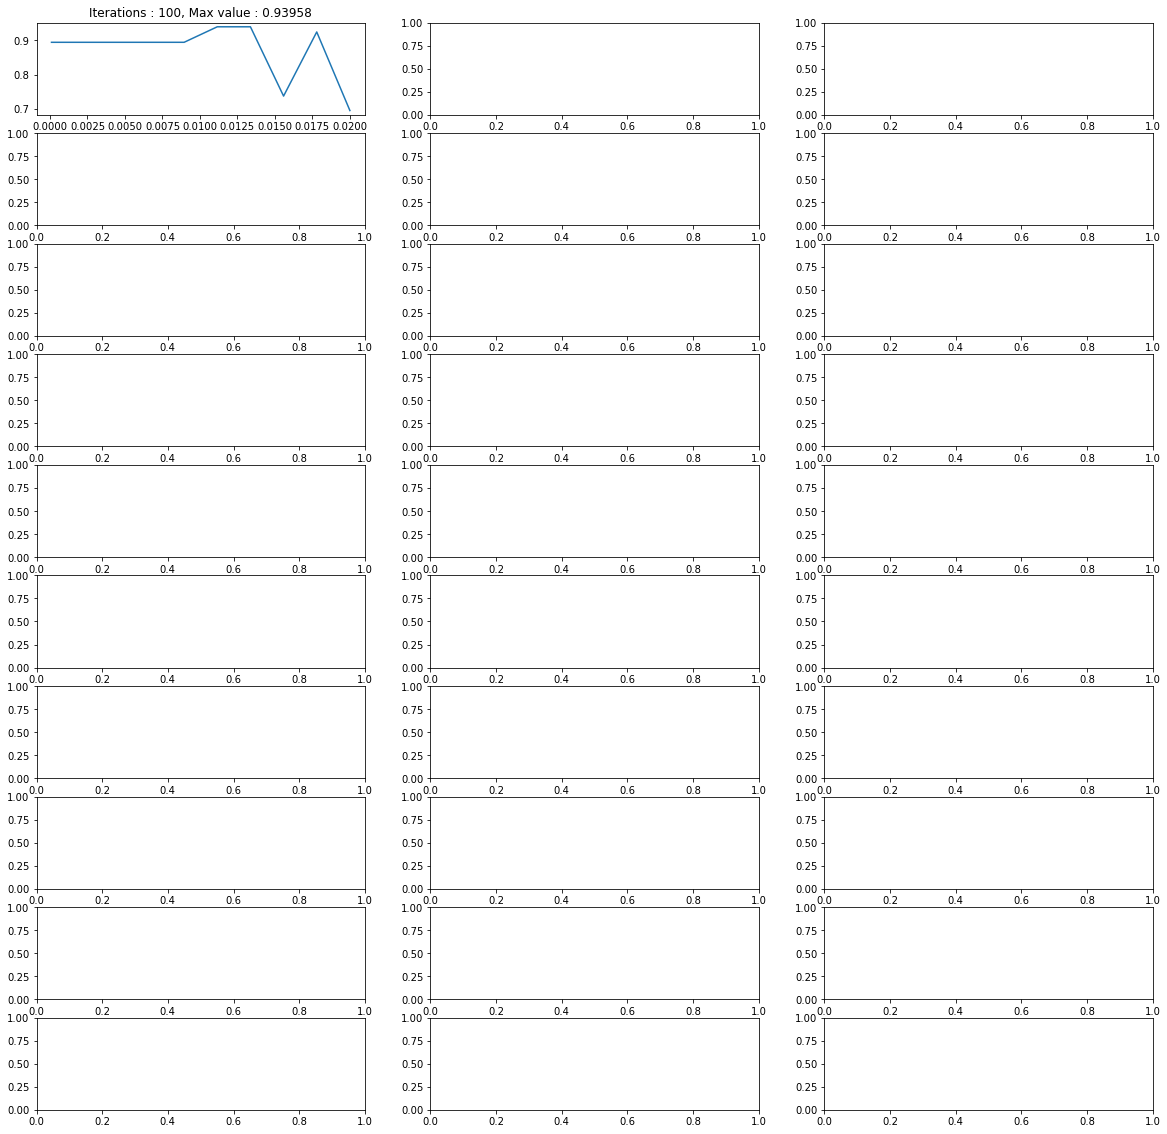

In [525]:
def optimizing_lr_and_iterations(): 
    iteration = [i*100 for i in range(1,31)]
    lr = np.linspace(0.0001,0.02,10)
    data = []
    for i in range(len(iteration)):
        lrs = [] 
        for j in range(len(lr)):
            model = LogisticRegression(iterations=iteration[i],alpha = lr[j])
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            model.confusion_matrix(predictions,Y_test)
            lrs.append(model.accuracy())
    data.append(lrs)
    
    
    r,c = 10,3
    fig,axs = plt.subplots(r,c)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    maxs = [max(i) for i in data]
    counter = 0 
    for i in range(r):
        for j in range(c) :
            axs[i][j].plot(lr,data[counter])
            axs[i][j].set_title('Iterations : {}, Max value : {}'.format(iteration[counter],round(maxs[counter],5)))
            counter+=1
    fig.tight_layout()

optimizing_lr_and_iterations()